<img src="https://raw.githubusercontent.com/YP144/PR_TKM/main/Soal.png" />

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Input data berdasarkan tabel A.1 dan A.4

In [19]:
# Data Karakteristik Pipa Carbonsteel
data_T1 = [300,400,600,800,1000]
data_Kpipa = [60.5,56.7,48,39.2,30]

# Data Karakteristik Fluida (udara)
data_T2 = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1100]
data_rho = [3.5562,2.3364,1.7458,1.3947,1.1614,0.995,0.8711,0.774,0.6964,0.6329,0.5804,0.5356,0.4975,0.4643,0.4354,0.4097,0.3868,0.3666,0.3482,0.3166]
data_cp = [1.032,1.012,1.007,1.006,1.007,1.009,1.014,1.021,1.03,1.04,1.051,1.063,1.075,1.087,1.099,1.11,1.121,1.131,1.141,1.159]
data_miu = [71.1,103.4,132.5,159.6,184.6,208.2,230.1,250.7,270.1,288.4,305.8,322.5,338.8,354.6,369.8,384.3,398.1,411.3,424.4,449]
data_v = [2,4.426,7.59,11.44,15.89,20.92,26.41,32.39,38.79,45.57,52.69,60.21,68.1,76.37,84.39,93.8,102.9,112.2,121.9,141.8]
data_k = [9.34,13.8,18.1,22.3,26.3,30,33.8,37.3,40.7,43.9,46.9,49.7,52.4,54.9,57.3,59.6,62,64.3,66.7,71.5]
data_a = [2.54,5.84,10.3,15.9,22.5,29.9,38.3,47.2,56.7,66.7,76.9,87.3,98,109,120,131,143,155,168,195]
data_pr = [0.786,0.758,0.737,0.72,0.707,0.7,0.69,0.686,0.684,0.683,0.685,0.69,0.695,0.702,0.709,0.716,0.72,0.723,0.726,0.728]

Regresi Data yang diperlukan

model data K_pipa dengan regresi polinom orde 7 



C:\Users\ACER\AppData\Local\Temp\ipykernel_12864\2915901100.py:13: RankWarning: Polyfit may be poorly conditioned
  Kpipa = regresi(data_T1,data_Kpipa)


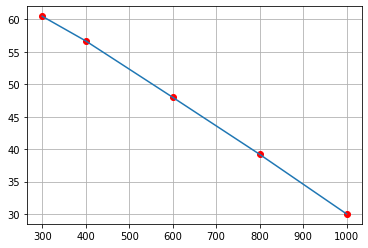

model data rho udara dengan regresi polinom orde 7 



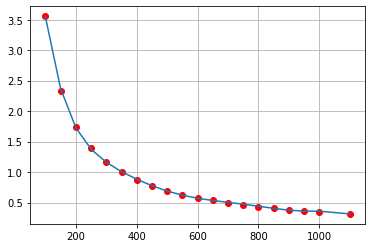

model data cp udara dengan regresi polinom orde 7 



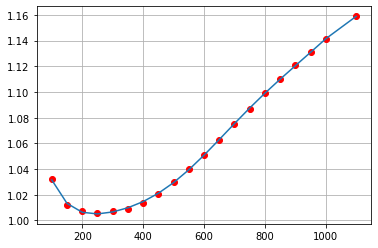

model data bilangan Pr  udara dengan regresi polinom orde 7 



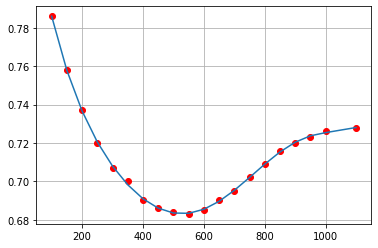

In [22]:
orde = 7
def regresi(data_T, data):
    fig,ax = plt.subplots(1)
    ax.plot(data_T, data,'o',color="red")
    model = np.poly1d(np.polyfit(data_T, data, orde))
    #print(model)
    plt.plot(data_T, model(data_T))
    plt.grid()
    plt.show()
    return model
# Membuat regresi data K pipa
print("model data K_pipa dengan regresi polinom orde "+str(orde),"\n")
Kpipa = regresi(data_T1,data_Kpipa)

# Membuat regresi data rho udara
print("model data rho udara dengan regresi polinom orde "+str(orde),"\n")
rho = regresi(data_T2, data_rho)

# Membuat regresi data Cp udara
print("model data cp udara dengan regresi polinom orde "+str(orde),"\n")
cp = regresi(data_T2, data_cp)

# Membuat regresi data miu udara
#print("model data miu udara dengan regresi polinom orde "+str(orde),"\n")
#miu = regresi(data_T2, data_miu)*10e-8

# Membuat regresi data v udara
#print("model data v udara dengan regresi polinom orde "+str(orde),"\n")
#v = regresi(data_T2, data_v)*10e-6

# Membuat regresi data k udara
#print("model data K_udara dengan regresi polinom orde "+str(orde),"\n")
#k = regresi(data_T2, data_k)*10e-4

# Membuat regresi data alfa udara
#print("model data alfa udara dengan regresi polinom orde "+str(orde),"\n")
#a = regresi(data_T2, data_a)*10e-6

# Membuat regresi data bilangan pr udara
print("model data bilangan Pr  udara dengan regresi polinom orde "+str(orde),"\n")
pr = regresi(data_T2, data_pr)


In [4]:
nim = "026"
Ti = 180+int(nim[0])+int(nim[1])+int(nim[2])+273
Tinf = 30+int(nim[2])+273
kec = 2
Kinsul = 0.03
Kcladd = 52
print("Suhu inner pipa :",Ti-273,"C\nSuhu Lingkungan :",Tinf-273,"C")

Suhu inner pipa : 188 C
Suhu Lingkungan : 36 C


<img src="https://raw.githubusercontent.com/YP144/PR_TKM/main/Carbonsteel_12inch_sch40.jpg" />
<img src="https://raw.githubusercontent.com/YP144/PR_TKM/main/radius.jpg" />

In [11]:
r1 = 0.15159
r2 = 0.1619
r3 = 0.1873
r4 = 0.1893
Diameter = 323.8e-3
#print(Diameter/2)

0.1619


<h1>Tanpa Insulasi</h1>

<img src="https://raw.githubusercontent.com/YP144/PR_TKM/main/without_insulator.jpg"/>

In [6]:
Tf = Tinf + 1
toleransi = 10e-15

error = 1
n=1
print("______________________________________________________________________________________________\n  n       Re          Pr         Nu         h          q        Ts          Tf        error\n______________________________________________________________________________________________")
while error > toleransi:

    Re = (rho(Tf)*kec*Diameter)/(miu(Tf)) #Re = (rho*v*D)/(miu)
    #if (Re*pr(Tf)) > 0.2 or (Re*pr(Tf)) == 0.2:
    Nu = 0.3 + ((0.62*(Re**(1/2))*(pr(Tf)**(1/3))) / ((1+(0.4/pr(Tf))**(2/3))**(1/4))) * ((1+(Re/282000)**(5/6))**(4/5))
    h = (Nu*k(Tf))/Diameter
    Res1 = (np.log(r2/r1))/(2*np.pi*Kpipa(Ti))
    Res2 = (1/(2*np.pi*h*r2))
    Rek = Res1 + Res2
    q = (Ti - Tinf)/Rek
    Ts = q*Res2+Tinf
    Tfnew = (Ts+Tinf)/2
    error = abs(((Tfnew-Tf)/Tf)*100)
    print("%3d %10.3f %10.3f %10.3f %10.3f %10.3f %10.3f %10.3f %10.5f %%" % (n, Re, pr(Tf), Nu, h, q, Ts-273, Tf-273, error))
    Tf = Tfnew
    n+=1

print("\nHeat loss dari pipa pada sistem sebesar :",q,"W/m")

______________________________________________________________________________________________
  n       Re          Pr         Nu         h          q        Ts          Tf        error
______________________________________________________________________________________________
  1  38518.742      0.706    109.614      9.150   1412.320    187.727     37.000   24.14950 %
  2  26629.422      0.693     87.451      8.825   1362.210    187.737    111.863    0.00126 %
  3  26628.834      0.693     87.450      8.825   1362.207    187.737    111.868    0.00000 %
  4  26628.834      0.693     87.450      8.825   1362.207    187.737    111.868    0.00000 %
  5  26628.834      0.693     87.450      8.825   1362.207    187.737    111.868    0.00000 %

Heat loss dari pipa pada sistem sebesar : 1362.2069187811455 W/m


nilai heat loss dari pipa tanpa menggunakan insulator cukup besar

<h1>Dengan Insulasi</h1>

<img src="https://raw.githubusercontent.com/YP144/PR_TKM/main/with_insulator.jpg"/>

In [12]:
d = 2*r4
Tf = Tinf + 1
toleransi = 10e-15

error = 1
n=1
print("______________________________________________________________________________________________\n  n       Re          Pr         Nu         h          q        Ts          Tf        error\n______________________________________________________________________________________________")
while error > toleransi:
    Re = (rho(Tf)*kec*d)/(miu(Tf)) #Re = (rho*v*D)/(miu)
    if (Re*pr(Tf)) > 0.2 or (Re*pr(Tf)) == 0.2:
        Nu = 0.3 + ((0.62*(Re**(1/2))*(pr(Tf)**(1/3))) / ((1+(0.4/pr(Tf))**(2/3))**(1/4))) * ((1+(Re/282000)**(5/6))**(4/5))
    h = (Nu*k(Tf))/d
    Res1 = (np.log(r2/r1))/(2*np.pi*Kpipa(Ti))
    Res2 = (np.log(r3/r2))/(2*np.pi*Kinsul)
    Res3 = (np.log(r4/r3))/(2*np.pi*Kcladd)
    Res4 = (1/(2*np.pi*h*r4))
    Rek = Res1 + Res2 + Res3 + Res4
    q = (Ti - Tinf)/Rek
    Ts = q*Res4+Tinf
    Tfnew = (Ts+Tinf)/2
    error = abs(((Tfnew-Tf)/Tf)*100)
    print("%3d %10.3f %10.3f %10.3f %10.3f %10.3f %10.3f %10.3f %10.3f %%" % (n, Re, pr(Tf), Nu, h, q, Ts-273, Tf-273, error))
    Tf = Tfnew
    n+=1

print("\nHeat loss dari pipa pada sistem sebesar :",q,"W/m")

______________________________________________________________________________________________
  n       Re          Pr         Nu         h          q        Ts          Tf        error
______________________________________________________________________________________________
  1  45037.665      0.706    120.602      8.611    174.511     53.040     37.000      2.426 %
  2  43252.955      0.704    117.534      8.572    174.424     53.107     44.520      0.011 %
  3  43245.185      0.704    117.521      8.572    174.423     53.108     44.554      0.000 %
  4  43245.151      0.704    117.520      8.572    174.423     53.108     44.554      0.000 %
  5  43245.150      0.704    117.520      8.572    174.423     53.108     44.554      0.000 %
  6  43245.150      0.704    117.520      8.572    174.423     53.108     44.554      0.000 %
  7  43245.150      0.704    117.520      8.572    174.423     53.108     44.554      0.000 %

Heat loss dari pipa pada sistem sebesar : 174.4232154370554

bila dibandingkan tanpa menggunakan insulator, heat loss jauh lebih kecil karena adanya insulator yang menyelimuti pipa

_____________________________________
  Tebal insulator       Qloss         
_____________________________________
     1.000 inch      174.423 W/m
     1.184 inch      151.933 W/m
     1.367 inch      134.947 W/m
     1.551 inch      121.661 W/m
     1.735 inch      110.984 W/m
     1.918 inch      102.212 W/m
     2.102 inch       94.877 W/m
     2.286 inch       88.651 W/m
     2.469 inch       83.298 W/m
     2.653 inch       78.647 W/m
     2.837 inch       74.566 W/m
     3.020 inch       70.957 W/m
     3.204 inch       67.741 W/m
     3.388 inch       64.858 W/m
     3.571 inch       62.257 W/m
     3.755 inch       59.898 W/m
     3.939 inch       57.750 W/m
     4.122 inch       55.784 W/m
     4.306 inch       53.978 W/m
     4.490 inch       52.313 W/m
     4.673 inch       50.774 W/m
     4.857 inch       49.345 W/m
     5.041 inch       48.016 W/m
     5.224 inch       46.776 W/m
     5.408 inch       45.617 W/m
     5.592 inch       44.530 W/m
     5.776 inch       43.50

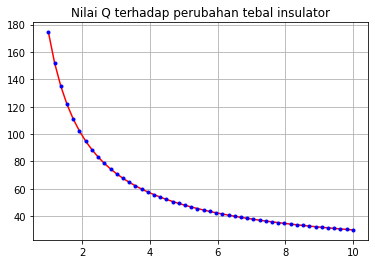

In [16]:
tebal = list(np.linspace(1,10))
qtot = []

print("_____________________________________\n  Tebal insulator       Qloss         \n_____________________________________")
for i in range(len(tebal)):
    r3 = r2 + tebal[i]*0.0254
    r4 = r3 +0.002
    d =  2*r4
    Tf = Tinf + 1
    toleransi = 10e-10

    error = 1
    n=1

    while error > toleransi:
        Re = (rho(Tf)*kec*d)/(miu(Tf)) #Re = (rho*v*D)/(miu)
        if (Re*pr(Tf)) > 0.2 or (Re*pr(Tf)) == 0.2:
            Nu = 0.3 + ((0.62*(Re**(1/2))*(pr(Tf)**(1/3))) / ((1+(0.4/pr(Tf))**(2/3))**(1/4))) * ((1+(Re/282000)**(5/6))**(4/5))
        h = (Nu*k(Tf))/d
        Res1 = (np.log(r2/r1))/(2*np.pi*Kpipa(Ti))
        Res2 = (np.log(r3/r2))/(2*np.pi*Kinsul)
        Res3 = (np.log(r4/r3))/(2*np.pi*Kcladd)
        Res4 = (1/(2*np.pi*h*r4))
        Rek = Res1 + Res2 + Res3 + Res4
        q = (Ti - Tinf)/Rek
        Ts = q*Res4+Tinf
        Tfnew = (Ts+Tinf)/2
        error = abs(((Tfnew-Tf)/Tf)*100)
    
        Tf = Tfnew
        n+=1

    qtot.append(q)
    print("%10.3f inch %12.3f W/m" % (float(tebal[i]), float(q)))

fig,ax = plt.subplots(1)
ax.plot(tebal,qtot,'-',color="red")
ax.plot(tebal,qtot,'.',color="blue")
plt.title("Nilai Q terhadap perubahan tebal insulator")
plt.grid()
plt.show()

#print("\nHeat loss dari pipa pada sistem sebesar :",q)

Semakin Tebal Insulator, maka akan semakin menurun heat loss dari pipa ke lingkungan